In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv('/Users/adam-work/Downloads/stocks.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [17]:
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


**Konwersja kolumny Date na typ datatime**

In [22]:
data['Date'] = pd.to_datetime(data['Date'])

In [24]:
data = data.sort_values('Date')

In [56]:
data.set_index('Date', inplace=True)

### **Przetwarzanie i wizualizacja danych**

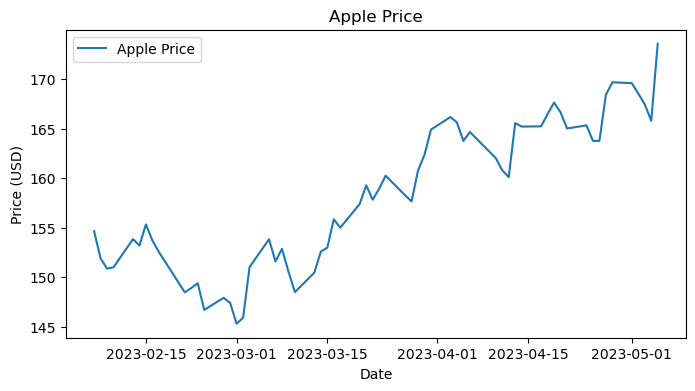

In [179]:
apple_data = data[data['Ticker'] == 'AAPL']

plt.figure(figsize= (8, 4))
plt.plot(apple_data.index, apple_data['Close'], label='Apple Price')
plt.title('Apple Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [67]:
volume = data.groupby('Ticker')['Volume'].sum()
format_volume = volume.apply(lambda x: f"{x:,}".replace(",", " "))

print('Volume by ticker:\n', format_volume)

Volume by ticker:
 Ticker
AAPL    3 737 543 400
GOOG    1 904 973 100
MSFT    1 912 597 900
NFLX      401 247 400
Name: Volume, dtype: object


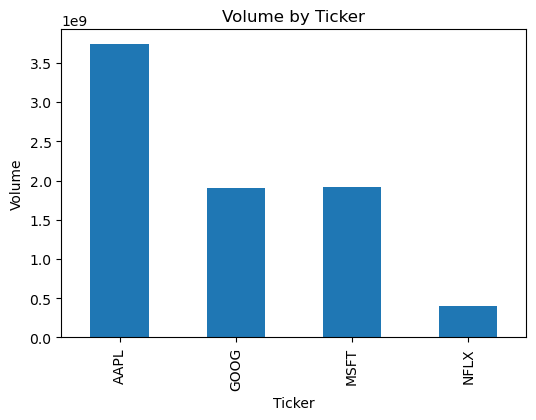

In [69]:
plt.figure(figsize= (6, 4))
volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Volume')
plt.title('Volume by Ticker')
plt.show()

**Dodanie średniej kroczacej (20)**

In [185]:
apple_data = data[data['Ticker'] == 'AAPL'].copy()
apple_data['SMA20'] = apple_data['Close'].rolling(window=20).mean()

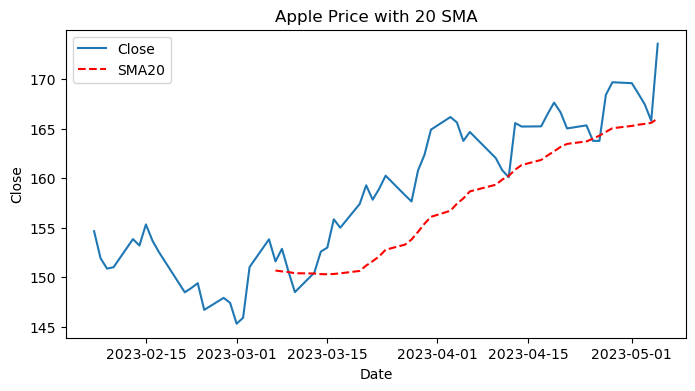

In [187]:
plt.figure(figsize=(8,4))
plt.plot(apple_data.index, apple_data['Close'], label='Close')
plt.plot(apple_data.index, apple_data['SMA20'], label='SMA20',linestyle='--', color='red')
plt.title('Apple Price with 20 SMA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

**Analiza stóp zwrotu dla AAPL**

In [101]:
apple_data['Returns'] = apple_data['Close'].pct_change()

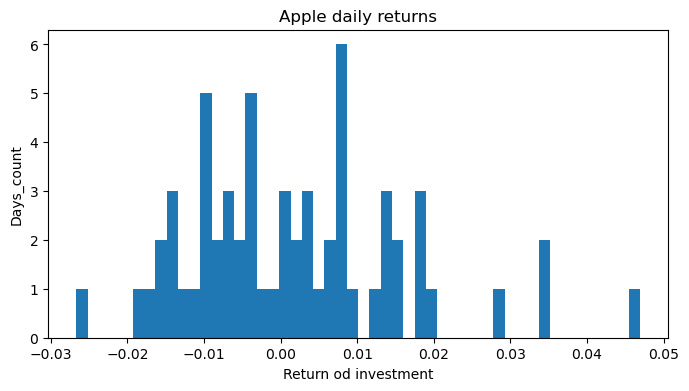

In [105]:
plt.figure(figsize=(8,4))
plt.hist(apple_data['Returns'].dropna(), bins= 50)
plt.title('Apple daily returns')
plt.xlabel('Return od investment')
plt.ylabel('Days_count')
plt.show()

**RSI dla AAPL**

In [191]:
window = 14
delta = apple_data['Close'].diff()

gain = delta.where(delta > 0, 0.0)
loss = delta.where(delta < 0, 0.0)

avg_gain = gain.ewm(alpha=1/window, adjust=False).mean()
avg_loss = -loss.ewm(alpha=1/window, adjust=False).mean()

RSI = avg_gain / avg_loss

apple_data['RSI'] = 100 - (100/(1+RSI))

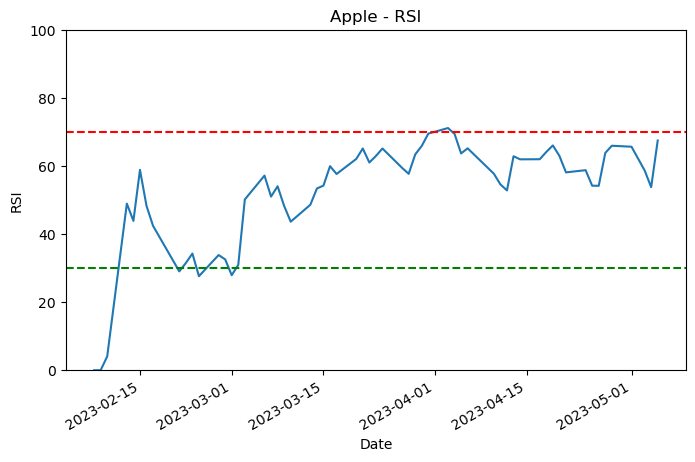

In [193]:
plt.figure(figsize=(8,5))
apple_data['RSI'].plot()
plt.axhline(70, color='red', linestyle='--')  # Poziom wykupienia
plt.axhline(30, color='green', linestyle='--') # Poziom wyprzedania
plt.title('Apple - RSI')
plt.ylabel('RSI')
plt.ylim(0, 100)
plt.show()

**Wykres ceny AAPL + RSI + SMA20**

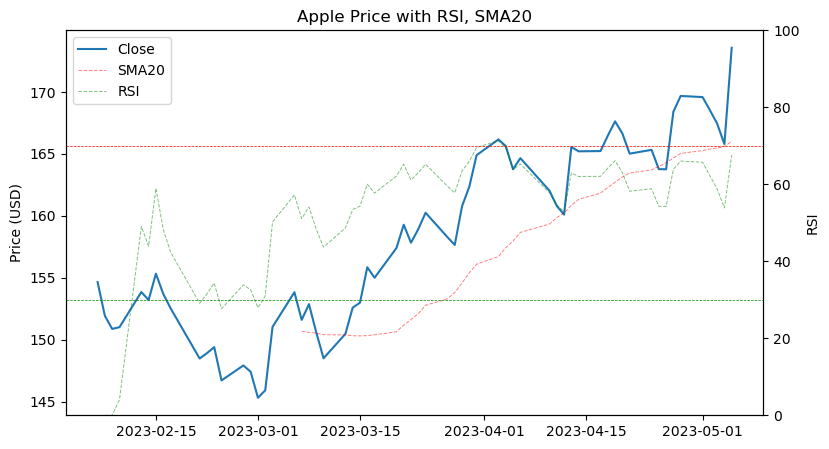

In [207]:
fig, ax1 = plt.subplots(figsize=(9,5))

ax1.plot(apple_data.index, apple_data['Close'], label='Close')
ax1.plot(apple_data.index, apple_data['SMA20'], label='SMA20', linestyle='--', color='red', alpha=0.5, linewidth=0.7)
ax1.set_title('Apple Price with RSI, SMA20')
ax1.set_ylabel('Price (USD)')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(apple_data.index, apple_data['RSI'], label='RSI', color='green', alpha=0.5, linestyle='--', linewidth=0.7)
ax2.axhline(70, color='red', linestyle='--', linewidth=0.5)
ax2.axhline(30, color='green', linestyle='--', linewidth=0.5)
ax2.set_ylabel('RSI')
ax2.set_ylim(0,100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()
